In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import h5py  
import pandas as pd
import numpy as np
import os

In [2]:
df = pd.read_pickle('../TESTS/dataframe_DMD-Bloch4D_SB_trn4_tst20_2023-Oct-07_at_13-53.pkl')
df.fillna(1)
df.columns

Index(['Gamma', 'State', 'Distance', 'Time', 'gt', 'Fidelity_b4DMD',
       'Infidelity_b4DMD', 'Fidelity_b4a', 'Infidelity_b4a'],
      dtype='object')

In [3]:
min(df.Fidelity_b4a)

0.9648626014222338

In [4]:
def add_log_infidelities(df):

    df['Infidelity_DMD'] = 1 - df.Fidelity_b4DMD
    df['Infidelity_ANL'] = 1 - df.Fidelity_b4a

    df['LogInF_DMD'] = np.log10(np.abs(df['Infidelity_DMD']))
    df['LogInF_ANL'] = np.log10(np.abs(df['Infidelity_ANL']))

    df.loc[df["LogInF_DMD"] < -15, "LogInF_DMD"] = -15
    df.loc[df["LogInF_ANL"] < -15, "LogInF_ANL"] = -15

    df['Gamma'] = df['Gamma'].astype(float)
    
    return df  

In [5]:
df = add_log_infidelities(df)

/home/zah/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/zah/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [6]:
ser_len = len(df.Gamma)

data1 = {'Gamma': df.Gamma,
        'State': df.LogInF_DMD,
        'Method': ['DMD'] * ser_len}

df1 = pd.DataFrame(data = data1) 

data2 = {'Gamma': df.Gamma,
        'State': df.LogInF_ANL,
        'Method': ['ANL'] * ser_len}

df2 = pd.DataFrame(data = data2) 

In [7]:
min(df.LogInF_DMD == df.LogInF_ANL)

True

/tmp/ipykernel_8818/1257937427.py:63: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


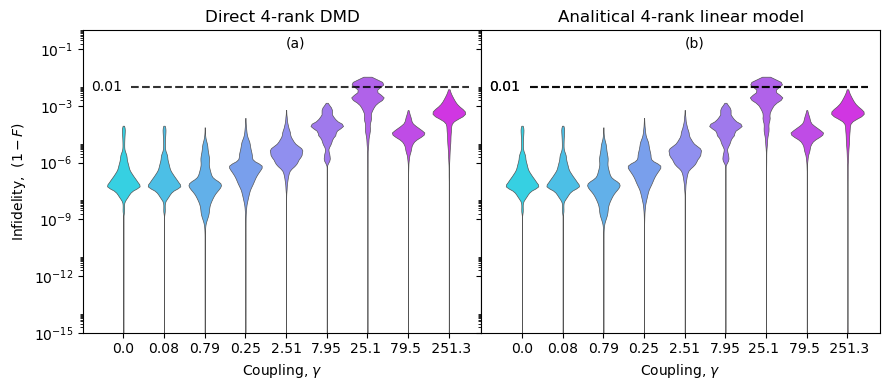

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(9,4), sharex = True, sharey = True)

sns.violinplot(ax=ax[0], data=df, x="Gamma", y='LogInF_DMD', cut = 0, # hue = "Method", split=True,
                    scale="width", palette ="cool", linewidth=0.5,
                    inner= None, bw="silverman")
ymin = -15
ymax = 1.
    
ytick_range = np.arange(ymin, ymax, 3)
ytick_labels = [r'$10^{-15}$', r'$10^{-12}$', r'$10^{-9}$', r'$10^{-6}$', r'$10^{-3}$', r'$10^{-1}$']

ax[0].yaxis.set_ticks(ytick_range, ytick_labels)
ax[0].yaxis.set_ticks([np.log10(x) for p in ytick_range for x in np.linspace(10 ** p, 10 ** (p + 1), 10)], minor=True)

ax[0].set_ylim(ymin, ymax)
ax[0].set_xlim(-1, 8.8)
ax[0].text(4, 0.1, '(a)')

ax[0].set_ylabel(r'Infidelity,  $(1-F)$')
ax[0].set_xlabel('')
ax[0].set_title('Direct 4-rank DMD')

ax[0].hlines(y=np.log10(.01), xmin=0.2, xmax=8.5, colors='black', linestyles='--', alpha=0.8)
ax[0].text(-.8, np.log10(.01), '0.01', ha='left', va='center')
ax[0].set_xlabel(r'Coupling, $\gamma$')

sns.violinplot(ax=ax[1], data=df, x="Gamma", y='LogInF_ANL', cut = 0, # hue = "Method", split=True,
                    scale="width", palette ="cool", linewidth=0.5,
                    inner= None, bw="silverman")

ax[1].yaxis.set_ticks(ytick_range, ytick_labels)
ax[1].yaxis.set_ticks([np.log10(x) for p in ytick_range for x in np.linspace(10 ** p, 10 ** (p + 1), 10)], minor=True)

ax[1].set_ylim(ymin, ymax)
ax[1].set_xlim(-1, 8.8)
ax[1].text(4, 0.1, '(b)')

ax[1].set_ylabel('')
ax[1].set_xlabel(r'Coupling, $\gamma$')
ax[1].set_title('Analitical 4-rank linear model')

xtick_range = np.arange(0, 9)
xtick_labels = ['0.0','0.08', '0.79', '0.25', '2.51', '7.95', '25.1 ', '79.5 ', ' 251.3']

ax[1].xaxis.set_ticks(xtick_range, xtick_labels)

ax[1].hlines(y=np.log10(.01), xmin=0.2, xmax=8.5, colors='black', linestyles='--', alpha=0.8)
ax[1].text(-.8, np.log10(.01), '0.01', ha='left', va='center')

ax[1].set_xlabel(r'Coupling, $\gamma$')

xtick_range = np.arange(0, 9)
xtick_labels = [ '0.0', '0.08', '0.79', '0.25', '2.51', '7.95', '25.1 ', '79.5 ', ' 251.3']

ax[1].xaxis.set_ticks(xtick_range, xtick_labels)

ax[1].hlines(y=np.log10(.01), xmin= 0.2, xmax=8.5, colors='black', linestyles='--', alpha=0.8)
ax[1].text(-.8, np.log10(.01), '0.01', ha='left', va='center')

fig.tight_layout()
fig.subplots_adjust(hspace = .0, wspace=.0)

fig.show()

In [9]:
os.getcwd()

'/home/zah/github/OQSID-thesis/DMD_Bloch4D'

In [10]:
fig.savefig("DMD-Bloch4_SB_LogInfid_rank-4_violin.pdf")